### 1. Transformer 등장 배경
- **RNN 계열**은 긴 시퀀스를 처리할 때 **순차적으로 처리**하기때문에 느림 + 장기 의존성 문제를 해결하지 못함
  - 장기 의존성 문제 : 은닉층의 과거 정보가 마지막까지 전달되지 못하는 현상

2017년 구글 발표(논문 Attention is all you need에서 나온 모델)
  - 기존의 seq2seq의 구조(LSTM 단위)를 따르면서도, 논문의 이름처럼 **어텐션**(Attention)만으로 구현한 모델

In [1]:
# 자연어처리에서 Attention : 특정 단어를 처리할 때, 입력의 어느 부분을 중요하게 볼지
# Self Attention 모델 : 입력 시퀀스 내부에서 모든 요소간 관계를 계산하여 문맥 정보 표현을 생성하는 모델

# ex) 월요일은 수업이 5시에 끝난다. 그래서 나는 오늘 5시에 쉴꺼다
# 오늘 -> 월요일 (관계 높음)
# 한 단어의 표현 : 다른 모든 단어 정보를 가중합한 결과

# Transformer : 모든 단어를 동시에 비교하면서 관계를 파악하는 모델 (단어간 거리 상관없음)
#18:03

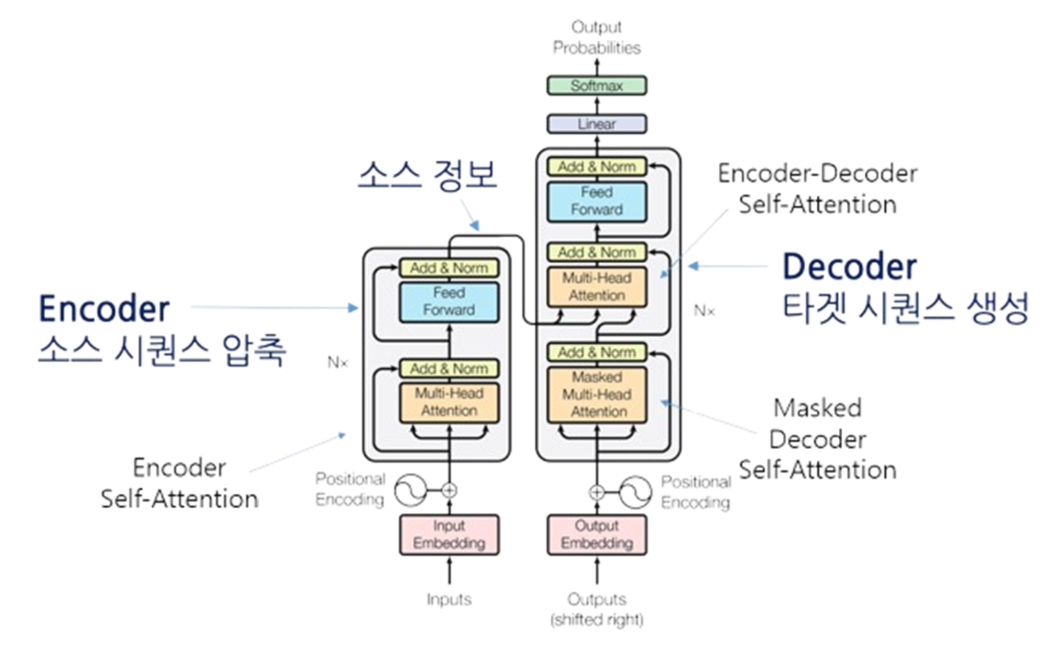

### 2. Transformer 구조
**Positional Encoding(위치 인코딩)**
- Self-Attention 기반 모델은 입력 순서를 순차적으로 처리하지 못함
- 구조적으로 순서 정보가 없음
- 이에 대해 토큰 간 순서 정보를 알려주기 위함(한 문장을 병렬로 처리하면서도 각 단어의 위치를 인지하게 된다.)

**Encoder Self-Attention**
- 인코더는 입력 문장의 모든 단어간의 관계를 계산하여, 문장 전체에서 중요한정보를 파악

**Add and Norm**
- 출력에 원래 입력을 더하고, 값을 정규화하여 안정된 학습을 도움
- ResNet모델 - Skip Connection 개념 차용
- Skip Connection : 전체를 새로 학습하지 않고, 기존과의 변화량만 학습

**Feed Forward**
- 활성화 함수(ReLU)를 사용해 입력을 처리해서, 비선형성을 통해 모델이 더 복잡한 패턴을 학습할 수 있게 만드는 완전연결신경망(MLP)

**Masked Decoder Self-Attention**
- 디코더가 예측할 때 미래 단어를 참조하지 못하게 막아, 이전 단어들만을 사용해 순차적으로 예측(과거 단어 참조 허용)
- 단어들을 수학적으로는 병렬처리, 논리적으로 순차
- ex) 오늘은 월요일 이다
  - '오늘' : '오늘'
  - '월요일' : '오늘', '월요일'
  - '이다' : '오늘', '월요일', '이다'
  - 학습할때는 한번에 계산, 논리적으로 한단어씩 생성한 것과 동일

**Encoder-Decoder Self-Attention**
- Seq2Seq Attention에서 발전된 형태
- 디코더가 인코더의 출력을 참조하여, 입력 문장과의 **관계**를 기반으로출력 생성
- 인코더 : 입력을 의미있는 표현으로 바꿈
- 디코더 : 표현을 보고 '출력'생성


## 모델링 개발 방식과 실행 환경 비교

> Open API를 활용하는 방법 vs 직접 AI를 개발하는 방법

| 방법              | 장점                                         | 단점                                             |
| --------------- | ------------------------------------------ | ---------------------------------------------- |
| **Open API 활용** | - 빠른 개발<br>- 비용 절감<br>- 높은 신뢰성             | - 제한된 커스터마이징<br>- 사용량에 따른 비용 증가<br>- 데이터 보안 이슈 |
| **직접 AI 개발**    | - 커스터마이징 가능<br>- 장기적인 비용 절감<br>- 데이터 보안 강화 | - 많은 시간과 전문 지식 필요<br>- 지속적인 유지보수 필요            |

---

> 노코드 모델링 vs 코딩을 활용한 AI 개발

| 방법              | 장점                               | 단점                                 |
| --------------- | -------------------------------- | ---------------------------------- |
| **노코드 모델링**     | - 접근성<br>- 빠른 프로토타이핑<br>- 직관적 사용 | - 제한된 기능<br>- 유연성 부족<br>- 성능 저하 가능 |
| **코딩 활용 AI 개발** | - 유연성<br>- 고성능 모델<br>- 확장성       | - 전문 지식 필요<br>- 시간 소요<br>- 복잡성     |

---

> Make an AI from scratch vs Transfer learning

| 방법                          | 장점                                            | 단점                                  |
| --------------------------- | --------------------------------------------- | ----------------------------------- |
| **Make an AI from scratch** | - 완전한 커스터마이징<br>- 최적화<br>- 모델 이해도             | - 시간·비용 많이 소요<br>- 많은 데이터 필요        |
| **Transfer learning**       | - 시간 절약<br>- 적은 데이터로도 높은 성능<br>- 사전 학습된 모델 활용 | - 제한된 커스터마이징<br>- 적용 범위 제한<br>- 복잡성 |

---

> 웹 서버, 클라우드 환경 vs Edge Computing

| 방법                 | 장점                                   | 단점                                   |
| ------------------ | ------------------------------------ | ------------------------------------ |
| **웹 서버·클라우드 환경**   | - 확장성<br>- 유지보수 용이<br>- 접근성          | - 비용 증가<br>- 네트워크 지연<br>- 보안 이슈      |
| **Edge Computing** | - 지연 감소<br>- 데이터 보안 강화<br>- 네트워크 독립성 | - 제한된 자원<br>- 개별 관리 필요<br>- 초기 비용 높음 |

---

> Local 환경구축 vs 클라우드기반 환경구축

| 방법               | 장점                                   | 단점                               |
| ---------------- | ------------------------------------ | -------------------------------- |
| **Local 환경구축**   | - 완전한 통제<br>- 보안 강화<br>- 고성능 하드웨어 사용 | - 초기 설치·유지보수 비용 높음<br>- 확장성 제한   |
| **클라우드 기반 환경구축** | - 확장성<br>- 비용 효율성<br>- 접근성           | - 제공자 의존<br>- 보안 이슈<br>- 네트워크 지연 |


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/est

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/est'
/home/hyuksu/projects/ml/bootcampdeeplearning/자연어처리


In [4]:
!pwd

/home/hyuksu/projects/ml/bootcampdeeplearning/자연어처리


Hugging Face_Transformers 라이브러리 설치하기
- colab : 구글에서 제공하는 클라우드 컴퓨팅 서비스, 주피터 노트북을 기반으로 작동하며, GPU 자원을 무료로 일부 활용할 수 있음.

- Hugging face : 인공지능 관련 데이터셋, 모델, 테스팅 공간 등을 공유하는 커뮤티니 웹서비스

In [5]:
# 'torch'옵션 : PyTorch 백엔드를 사용하는 모델을 위한 추가 패키지 설치
!pip -q install transformers[torch]

### NLP(Natural Language Processing) Task 맛보기
- HuggingFace : https://huggingface.co/models
- task : 작업 단위


### Transformer 종류

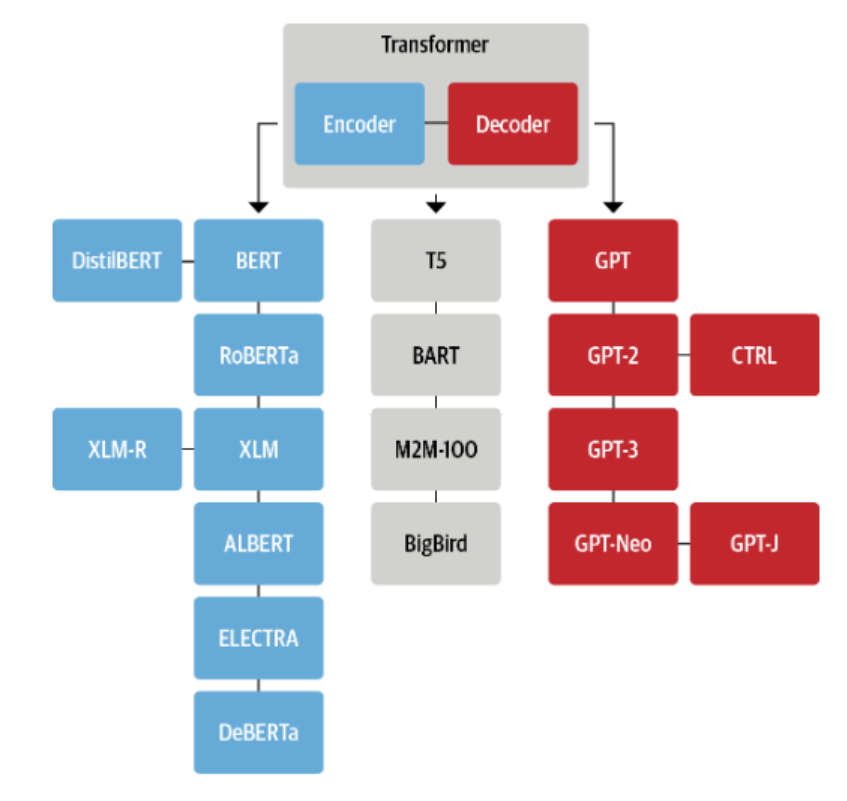

### 넓은 관점에서 트랜스포머 모델은 세가지로 범주화 할 수 있음

##### BERT 계열
- Transformer 모델의 Encoder만 활용
- 입력 전체를 한번에보고, 양방향으로 학습(앞뒤 문맥)
- 대표 모델 : BERT, ELECTRA 등
- 주 사용처 : 문장 분류, 개체명 인식, 문장 유사도 등 전체 문장에 대한 이해를 요구하는 작업

##### Seq2Seq 계열
- Sequence-to-Sequence(인코딩 -> 디코딩) 구조
- 다양한 생성, 이해 작업에 강점
- 대표모델 : BART
- 주 사용처 : 제로샷 분류, 요약/번역/재작성 등
  - 다수 task(요약,번역,재작성)을 하나의 모델로 운영할 때 자주 사용

##### GPT계열
- Transformer모델의 Decoder만 활용
- 입력을 순차적으로 처리하면서 토큰 예측
- 대표 모델 : GPT, GPT-2 ~ GPT-5
- 주 사용처 : 텍스트 생성, 대화형 에이전트

## 시나리오
### 배경
- '세이프챗'은 월간 활성 사용자 100만명을 보유한 글로벌 커뮤니티 플랫폼
- 매일 평균 10,000건 이상의 게시글이 한국어,영어,스페인어 등 여러 언어로 등록되어 수동 검토 불가능
- 기존 RNN계열 모델은 긴 시퀀스 처리 한계, 순차적 처리 병목으로 인해 다국어 분류 및 번역 속도 저하
- Transformer Pipeline을 통해 감성 분석, 감성 분석에 자동 번역을 더한 실시간 다국어 감성분석, 제로샷 토픽 분류를 통합 운영해야하는 과제 존재

```python
# 주요 이해관계자
- 개발팀 : HuggingFace Pipeline 기반 API 설계 및 배포
- 운영팀 : 실시간 모니터링 및 이상 징후 알림 시스템 운영
- 콘텐츠팀 : 분류 및 번역 결과를 활용한 다국어 콘텐츠 현지화 전략 수립
```

### BERT 계열 - 감성분석
- Text Classification : 텍스트를 입력으로 받아 텍스트가 어떤 종류의 범주에 속하는지를 구분하는 작업
- 감성분석 : 텍스트 내에서 사람의 기분,감정,의견 등을 예측하는 기술

In [8]:
!pip install transformers


In [9]:
from transformers import pipeline
# transformers : Hugging Face에서 제공되는 transformer 기반 모델을 쉽고 일관성 있게 사용할 수 있도록 해주는 라이브러리
# pipeline : 감정 분석, 번역, 요약 등 다양한 task를 한줄로 수행할 수 있는 고수준 유틸리티 함수

ModuleNotFoundError: No module named 'transformers'

### KoELECTRA 모델
- 한국어에 특화된 ELECTRA 모델


In [ ]:
# 문장 예시
# ex) 오늘은 월요일이다.그래서 너무 힘들다

# BERT
# 오늘은 [MASK]이다
# 빈칸을 맞추는 방향으로 학습

# ELECTRA
# 오늘은 [금요일]이다(가짜 문장)
# 오늘은 [월요일]이다(진짜 문장)
# 단어가 진짜인지 가짜인지 판단 학습

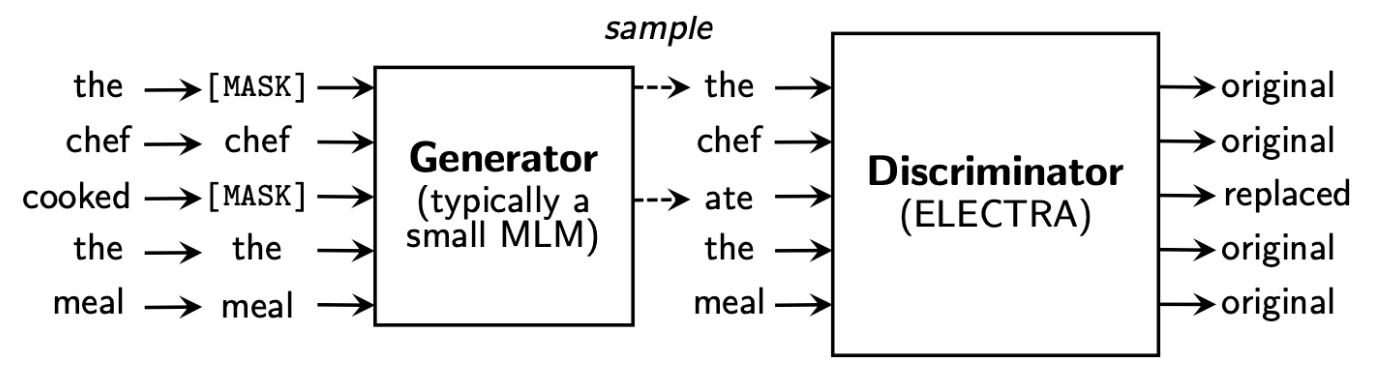

```python
# ELECTRA의 'Replaced Token Detection' 방식
1. 입력 문장 일부 토큰 마스킹
- ex) "the chef cooked the meal" 중 "the"와 "cooked"를 [MASK] 처리

2. Generator (작은 MLM 모델)
- MLM(Masked Language Model) : 전체 문장에서 일부 단어를 마스킹(Masking)하고, 해당 마스킹(Masking)된 단어를 모델의 입력으로 주어졌을 때, 마스킹된 단어를 예측하는 task
- 마스킹된 위치에 원래 토큰인지, 가짜 토큰인지 예측
- ex) [MASK] → "the" / [MASK] → "ate"
- 결과) "the chef ate the meal" (일부 토큰이 대체됨)

3. Discriminator (ELECTRA 본체)
- 각 토큰이 "원본(original)"인지 "대체(replaced)"인지 판별
- ex)
the → original
chef → original
ate → "replaced"
the → original
meal → original

- 작은 '생성기(generator)' 모델이 일부 단어를 가짜 토큰으로 바꿔 넣음
- 큰 '판별기(discriminator)' 모델이 "이 토큰이 원래 단어인가?"를 판별하며 학습
  → 모든 토큰을 검사하므로 학습 신호가 더 많고, 효율이 높음

# ELECTRA는 "가린 단어를 맞추는" 대신 "바뀐 단어를 찾아내는" 학습 방식을 써서 더 빠르고 가성비 좋게 학습 가능
```

실습용 사전학습 Model 경로 : https://huggingface.co/daekeun-ml/koelectra-small-v3-nsmc
- daekeun-ml : 일반 사용자
- koelectra-small-v3-nsmc : Naver Sentiment Movie Corpus dataset(네이버 영화리뷰 데이터셋)으로 FineTuning된 koElectra모델

In [ ]:
# 한국어 분류 모델(Ko Electra) Pipeline 로드

classifier = pipeline(
    task = 'sentiment-analysis', # 작업 단위 지정
    model="daekeun-ml/koelectra-small-v3-nsmc", # 사용할 사전학습MODEL 경로
    device = 0 # GPU 사용 (CPU : -1, GPU 0번째 장치)
)

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/56.5M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


#### 파이프라인 Task 종류

| 파이프라인                      | 설명                                |
| -------------------------- | --------------------------------- |
| `feature-extraction`       | 특징 추출 (텍스트에 대한 벡터 표현 추출)          |
| `fill-mask`                | 마스크 채우기                           |
| `ner`                      | 개체명 인식 (Named Entity Recognition) |
| `question-answering`       | 질의 응답                             |
| `sentiment-analysis`       | 감정 분석                             |
| `summarization`            | 요약                                |
| `text-generation`          | 텍스트 생성                            |
| `translation`              | 번역                                |
| `zero-shot-classification` | 제로샷 분류 (레이블 분류)                   |


In [ ]:
# 예측 수행 // 0 -> 부정, 1 -> 긍정
classifier('넌 정말 팀장감인 사람이야')

[{'label': '1', 'score': 0.9744208455085754}]

## 🤖 BERT vs ELECTRA 학습 방식 비교

| 구분 | BERT (MLM) | ELECTRA (RTD) |
|:---:|:---|:---|
| **학습 개념** | **빈칸을 맞추는 방향** | **단어가 진짜인지 가짜인지 판단** |
| **핵심 기술** | **MLM** (Masked Language Modeling) | **RTD** (Replaced Token Detection) |
| **학습 방법** | 문장의 일부 단어를 `[MASK]` 처리하고 원래 단어를 추론 | 일부 단어를 가짜로 바꾸고 각 단어의 진위 여부를 판별 |
| **예시 문장** | "오늘은 **[MASK]**이다" | "오늘은 **[금요일]**이다" (가짜 문장) |
| **모델의 판단** | `[MASK]` = **월요일** (정답 추론) | `[금요일]` = **가짜(Replaced)** / `[오늘]` = **진짜(Original)** |
| **주요 특징** | 정답 단어 자체를 맞추는 데 집중 | 모든 토큰을 학습에 활용하여 효율 및 맥락 파악 능력 우수 |

In [ ]:
classifier('넌 정말 팀장자격이 없어.')

[{'label': '0', 'score': 0.8658607006072998}]

In [ ]:
# 여러개 예측 가능
classifier(['이 영화 정말 재밌어요.', '별로인데?', '잘한다', '자~알 한다'])

[{'label': '1', 'score': 0.9919895529747009},
 {'label': '0', 'score': 0.9993563294410706},
 {'label': '1', 'score': 0.9685253500938416},
 {'label': '0', 'score': 0.9448397159576416}]

### 2. Seq2Seq 계열 - 문장번역(Translation)

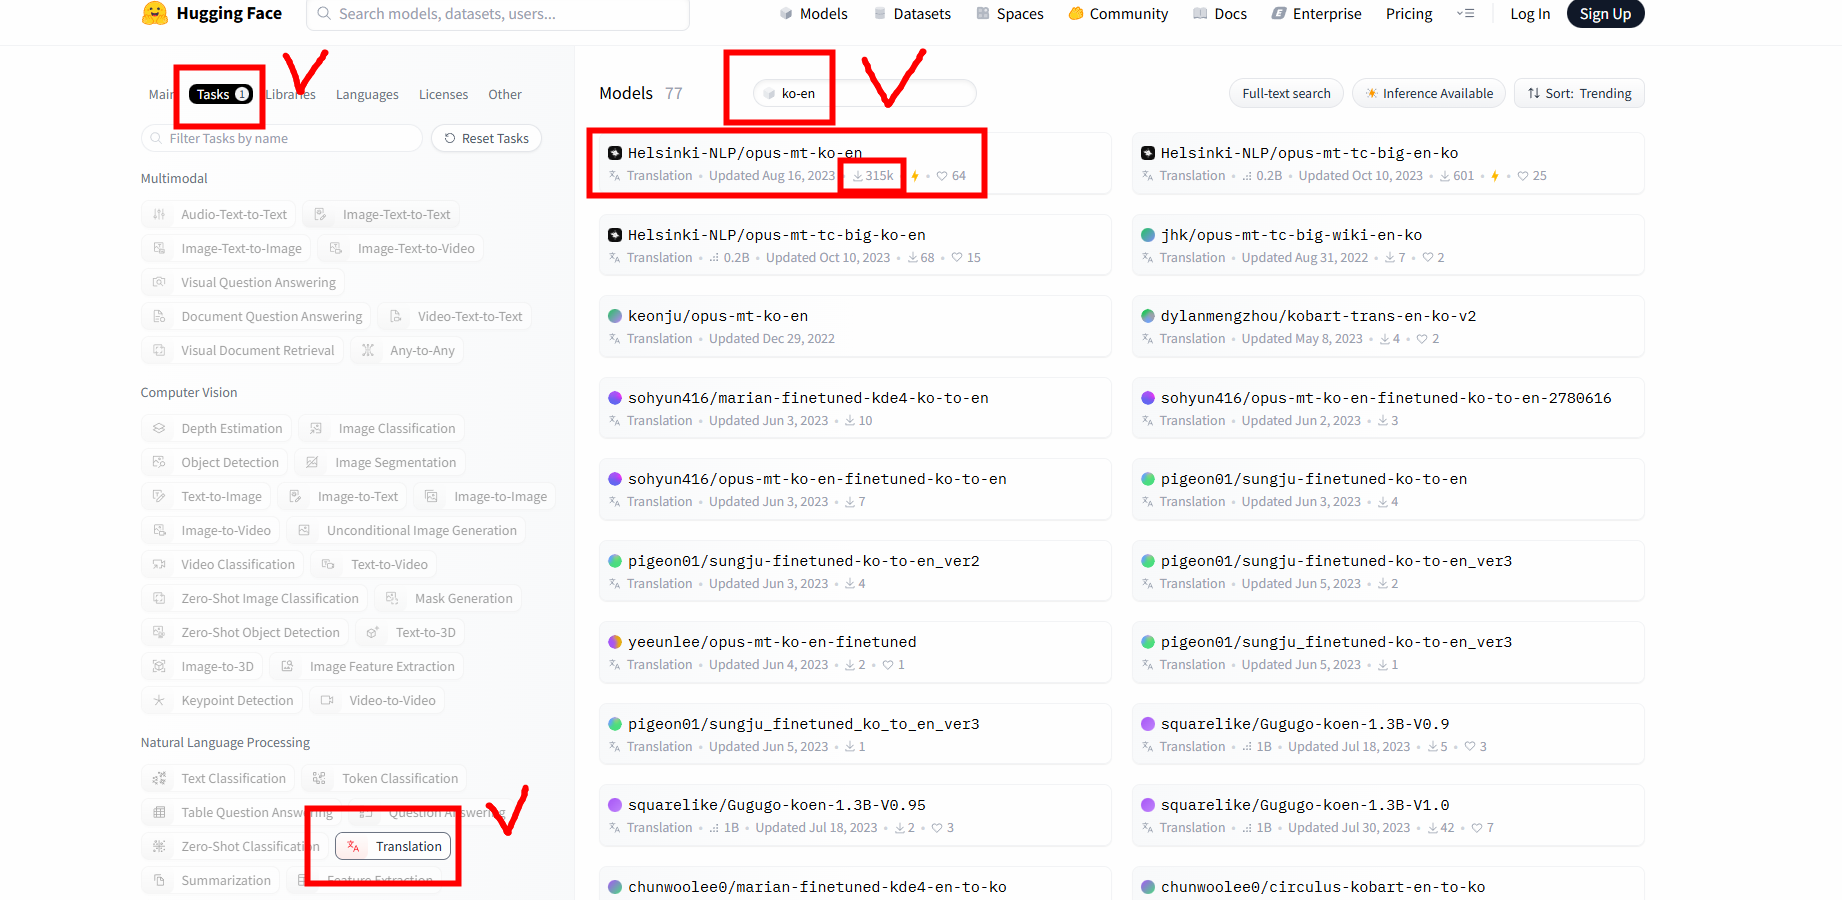

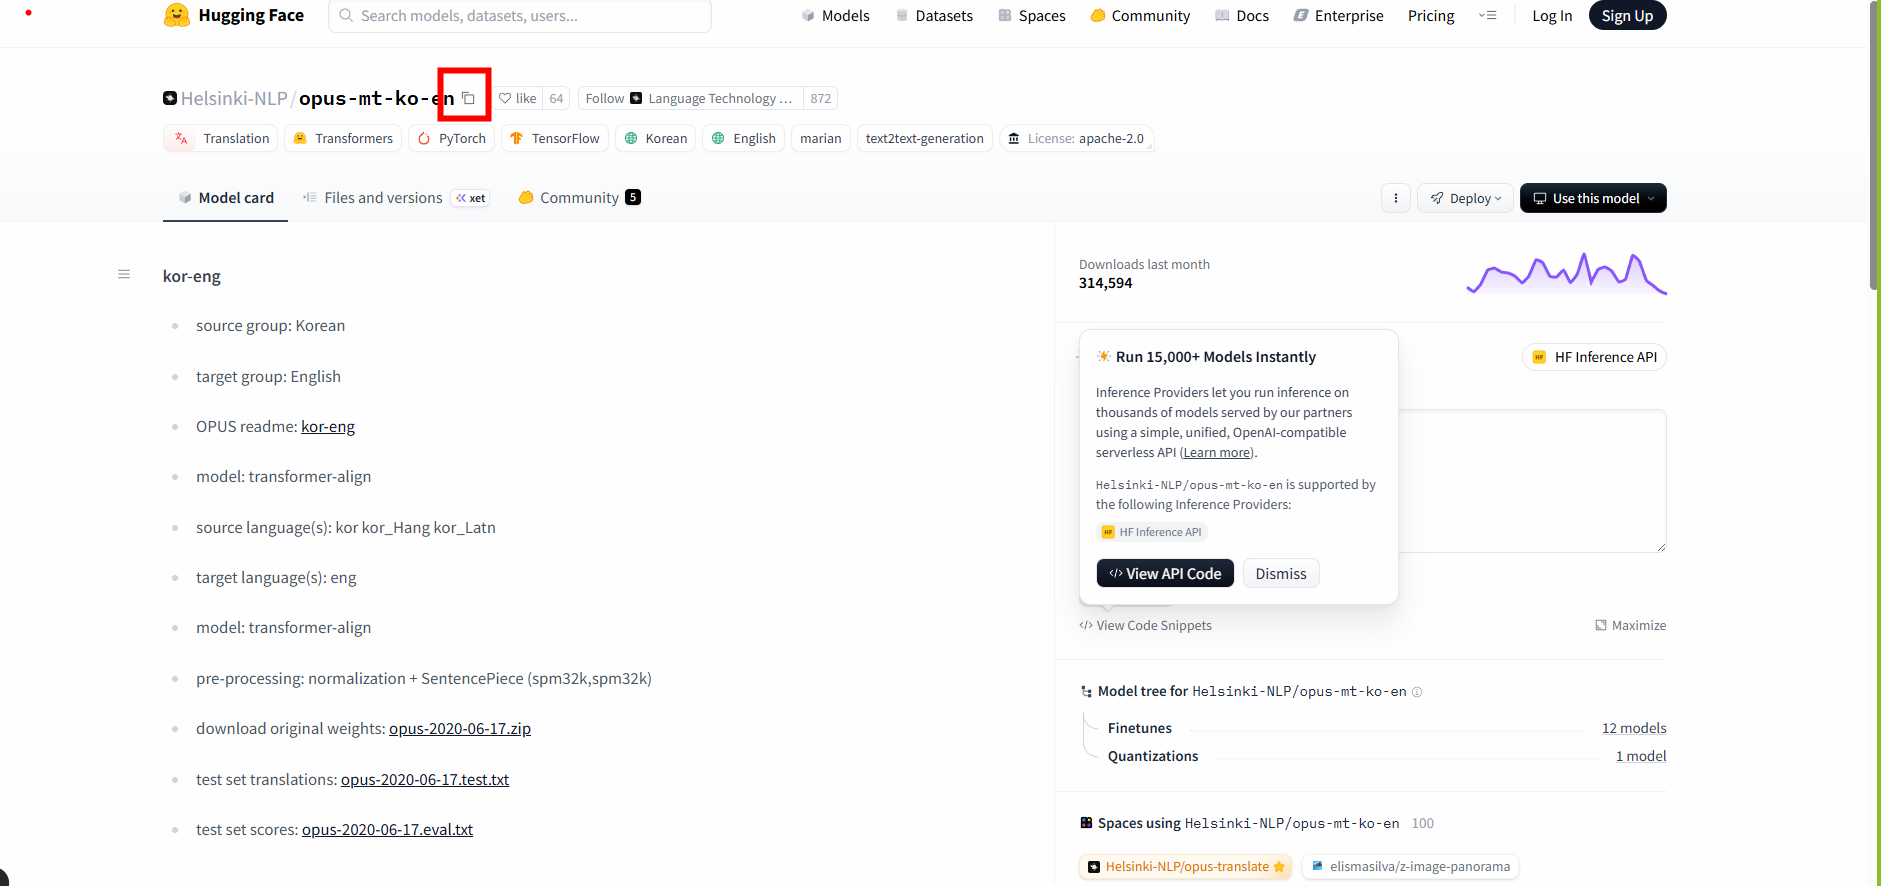

In [ ]:
import transformers
print(transformers.__version__)


4.57.6


In [ ]:
from transformers import pipeline

ko_to_en = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-ko-en",
    framework="pt",
    device=-1,  # CPU
    model_kwargs={"use_safetensors": True}
)



# warnings : "Recommended: pip install sacremoses." : 추가적으로 sacremoses 패키지를 설치하는것을 추천
# sacremoses : 주로 텍스트 전처리(토큰화, 정규화) 품질을 높여줄 수 있음

ImportError: cannot import name 'pipeline' from 'transformers' (/home/hyuksu/projects/ml/.venv/lib/python3.10/site-packages/transformers/__init__.py)

In [ ]:
ko_to_en('오늘도 보람찬 하루였습니다. 내일도 즐거운 마음으로 출근해야지')

[{'translation_text': "It's been a rewarding day, and I'll be happy to come to work tomorrow."}]

In [ ]:
ko_to_en('집에 가고 싶다. 5시 되면 칼퇴근 해야지')

# 칼퇴근이라는 단어는 신조어 or 은어
# 모델이 학습되지 않은 텍스트는 출력이 제대로 되지 않음.

[{'translation_text': 'I want to go home, get back to work by 5:00.'}]

### 자연어처리
- 컴퓨터가 **인간 언어를 이해, 처리, 생성**할 수 있도록 만드는 기술 전반
- 목적 : 문장 이해, 번역, 요약, 감성 분석, 챗봇, 질문 답변
- 데이터의 형태 : 텍스트
- 방법 : 모델 학습, 토크나이징, Transformer, BERT, GPT 등
- 예시
  - 이 리뷰가 긍정인지 부정인지 판별
  - 뉴스 기사 요약 생성
  - 문장을 다른 언어로 번역

### 텍스트마이닝
- 대량 텍스트에서 **유용한 정보를 추출**하고, 숨겨진 패턴을 찾음
- 목적 : 데이터 분석, 통계, 패턴 발견, 토픽 추출, 키워드 분석
- 데이터 형태 : 수많은 문서, 게시글
- 방법 : TF-IDF, Word2Vec, Zero-shot Classification
- 예시
  - 긍정에 영향을 미친 단어 top10 추출
  - 사용자 리뷰에서 어떤 주제가 많이 언급되었는지 분석
  - 뉴스 기사에서 정치,경제,스포츠 비율 통계

### 3. zero-shot Classification(제로샷 분류)
- 사전 훈련된 NLI모델(Natural Language Inference)을 이용해 새로운 라벨(클래스)에도 별도의 학습 없이 분류를 수행하는 task

- 텍스트 레이블을 다는 것은 시간이 많이 소요되고 도메인 지식이 필요하기 때문에 이러한 작업은 실제 프로젝트에서 아주 흔한 상황

- 입력 문장과 후보 라벨(프롬프트 구성) 간의 연관성을 점수화 하여 가장 적합한 라벨 예측
- 텍스트마이닝(추상적인 topic)에서도 사용

#### 장점
- 학습데이터가 없거나 부족한 도메인에서도 즉시 분류 가능
- 유연하게 라벨을 추가/변경 할 수 있음

#### 단점
- NLI 모델이 다루지 못하는 복잡한 task는 성능 저하
- 라벨 문장 설계에 따라 결과가 민감하게 변동됨

- xlm-roberta-large-xnli : 한국어 포함 총 100여개 언어 지원, 가장 널리 쓰이는 제로샷 분류용 모델 중 하나
- 허깅페이스 링크 : https://huggingface.co/joeddav/xlm-roberta-large-xnli

In [ ]:
# RoBERTa Model 로드
classifier = pipeline(
    task = 'zero-shot-classification',
    model = 'joeddav/xlm-roberta-large-xnli',
    device = 0
)

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# 분류할 문장 정의 (리뷰)
sequences = [
    # 폭싹 속았수다(드라마) 리뷰
    "요즘 '폭싹속았수다' 보는 재미로 산다 ㅠ 나 보는거 엄마가 옆에서 보고는 아이유 연기 잘한다고 재밌게 보더니 나 없을 때 정주행하심 ㅋㅋ",

    # 정치 관련 뉴스 내용 일부분
    '최근 대선 후보에 대한 논쟁이 뜨겁습니다. 중앙선거관리위원회는 대부분의 후보가 오늘자로 후보자 등록 서류를 제출했다고 밝혔습니다.'
]

In [ ]:
# 후보 라벨(토픽)
candidata_labels = ['드라마/영화', '정치', '사회/기술', '경제', '음식', '스포츠']

In [ ]:
# 제로샷 분류 진행
results = classifier(
    sequences,
    candidate_labels = candidata_labels,
    multi_label = True # True로 하면 다중 라벨, False면 단일 라벨
)

In [ ]:
results

[{'sequence': "요즘 '폭싹속았수다' 보는 재미로 산다 ㅠ 나 보는거 엄마가 옆에서 보고는 아이유 연기 잘한다고 재밌게 보더니 나 없을 때 정주행하심 ㅋㅋ",
  'labels': ['드라마/영화', '스포츠', '경제', '사회/기술', '정치', '음식'],
  'scores': [0.9898326396942139,
   0.7755901217460632,
   0.26348626613616943,
   0.2357361614704132,
   0.15168972313404083,
   0.01783875748515129]},
 {'sequence': '최근 대선 후보에 대한 논쟁이 뜨겁습니다. 중앙선거관리위원회는 대부분의 후보가 오늘자로 후보자 등록 서류를 제출했다고 밝혔습니다.',
  'labels': ['정치', '경제', '스포츠', '사회/기술', '드라마/영화', '음식'],
  'scores': [0.9974635243415833,
   0.027237672358751297,
   0.023845819756388664,
   0.003626742633059621,
   0.003618157235905528,
   0.0033558194991201162]}]

In [ ]:
# 제로샷 분류에서 나오는 scores는 합이 1이 되도록 정규화된 확률이 아님
# 각 라벨에대한 독립적인 '적합도'점수

In [ ]:
import numpy as np
score = [0.9974, 0.0272, 0.0238, 0.0036, 0.0036, 0.0034]
softmax_score = np.exp(score) / np.sum(np.exp(score))
# exp(scores) = e^(scores)
# 자연상수 e = 2.718~
print(softmax_score)

# 소프트맥스 적용하면 정규화 진행 가능하지만, 순위로만 활용해도 되기 때문에 진행하지 않아도 됨

[0.34877766 0.13218925 0.13174057 0.12910611 0.12910611 0.12908029]


In [ ]:
results[0].keys()

dict_keys(['sequence', 'labels', 'scores'])

In [ ]:
# 결과 출력
for re in results: # 2번 반복
  print(f'입력 문장 : {re['sequence']}')
  print(re['labels'][0]) # 가장 높은 확신도를 가진 라벨
  print(re['scores'][0]) # 가장 높은 확신도
  print()


입력 문장 : 요즘 '폭싹속았수다' 보는 재미로 산다 ㅠ 나 보는거 엄마가 옆에서 보고는 아이유 연기 잘한다고 재밌게 보더니 나 없을 때 정주행하심 ㅋㅋ
드라마/영화
0.9898326396942139

입력 문장 : 최근 대선 후보에 대한 논쟁이 뜨겁습니다. 중앙선거관리위원회는 대부분의 후보가 오늘자로 후보자 등록 서류를 제출했다고 밝혔습니다.
정치
0.9974635243415833



In [ ]:
len(results)

2

In [ ]:
results

[{'sequence': "요즘 '폭싹속았수다' 보는 재미로 산다 ㅠ 나 보는거 엄마가 옆에서 보고는 아이유 연기 잘한다고 재밌게 보더니 나 없을 때 정주행하심 ㅋㅋ",
  'labels': ['드라마/영화', '스포츠', '경제', '사회/기술', '정치', '음식'],
  'scores': [0.9898326396942139,
   0.7755901217460632,
   0.26348626613616943,
   0.2357361614704132,
   0.15168972313404083,
   0.01783875748515129]},
 {'sequence': '최근 대선 후보에 대한 논쟁이 뜨겁습니다. 중앙선거관리위원회는 대부분의 후보가 오늘자로 후보자 등록 서류를 제출했다고 밝혔습니다.',
  'labels': ['정치', '경제', '스포츠', '사회/기술', '드라마/영화', '음식'],
  'scores': [0.9974635243415833,
   0.027237672358751297,
   0.023845819756388664,
   0.003626742633059621,
   0.003618157235905528,
   0.0033558194991201162]}]

- 파이프라인을 활용하면 `토크나이징→모델 예측→결과 해석`의 과정을 한 번에 처리 가능
- 허나, 단점도 존재함

| 방식           | 장점                          | 단점                            |
| ------------ | --------------------------- | ----------------------------- |
| **파이프라인**    | - 한 줄로 추론<br>- 자동 전후처리      | - 커스터마이징(ex.Fine Tuning 등) 불가<br>- 배치·학습 불가     |
| **직접 모델 호출** | - 세부 제어 가능<br>- 배치 처리·학습 가능 | - 코드 작성량 증가<br>- 전처리 직접 구현 필요 |


### 4. 직접 모델을 로드해보자
1. 토크나이저, KoElectra 모델 로드
2. 인코딩된 입력을 모델에 전달

KoElectra 사전학습모델(소형)링크:
https://huggingface.co/monologg/koelectra-small-finetuned-nsmc
- monologg 팀(한국어 NLP 엔지니어팀)이 다양한 크기('base','small')버전(v1~v3)으로 공개
- nsmc : Naver Sentiment Movie Corpus(네이버 영화리뷰데이터)
- 이진분류 모델


#### monologg/koelectra 주요 버전 및 종류

- GitHub : https://github.com/monologg/KoELECTRA/blob/master/README.md

| 모델 이름                                       | 크기    | 역할            | 설명                                                         |
| ------------------------------------------- | ----- | ------------- | ---------------------------------------------------------- |
| `monologg/koelectra-base-generator`         | Base  | Generator     | 토큰 생성기(generator) 역할 · v3 이전 버전         |
| `monologg/koelectra-base-discriminator`     | Base  | Discriminator | 토큰 판별기(discriminator) 역할 · v1/v2 기본 버전  |
| `monologg/koelectra-base-v3-generator`      | Base  | Generator     | v3 버전 · generator                       |
| `monologg/koelectra-base-v3-discriminator`  | Base  | Discriminator | v3 버전 · discriminator                   |
| `monologg/koelectra-small-generator`        | Small | Generator     | 소형 모델 · generator                       |
| `monologg/koelectra-small-discriminator`    | Small | Discriminator | 소형 모델 · discriminator                   |
| `monologg/koelectra-small-v3-generator`     | Small | Generator     | v3 소형 버전 · generator (NSMC 감성분석 등에 활용 가능)                  |
| `monologg/koelectra-small-v3-discriminator` | Small | Discriminator | v3 소형 버전 · discriminator (감정분석, 문장분류 등)                    |
| `monologg/koelectra-small-v3-goemotions`    | Small | Discriminator | v3 소형 버전 · GoEmotions 감정분류용 (영문 감정 레이블 매핑)                 |
| `monologg/koelectra-base-v3-naver-ner`      | Base  | Discriminator | v3 버전 · Naver NER(개체명 인식)용 fine-tuned 모델                   |
| `monologg/koelectra-base-v3-gender-bias`    | Base  | Discriminator | v3 버전 · 성별 편향 분석용 (gender-bias) 모델                         |

> ※ Generator는 ELECTRA 학습 시 가짜 토큰을 만드는 역할, Discriminator는 가짜 vs 진짜 토큰을 구분하는 역할을 수행

In [ ]:
# Use a pipeline as a high-level helper (파이프라인을 도우미로 사용)
from transformers import pipeline

pipe = pipeline("text-classification", model="monologg/koelectra-small-finetuned-nsmc")

config.json:   0%|          | 0.00/756 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/55.1M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/102 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
# 예시 문장 (긍정적인 드라마 리뷰)
sentence = ['힘들고 지칠 때마다 한번씩 거기보고 외치세요 학!씨~ ㅋㅋㅋㅋ 이 아저씨 너무 좋아 ㅋㅋㅋ', '아이유 연기 잘한다. 이제 연기자라고 하자!']

In [ ]:
pipe(sentence)

[{'label': 'positive', 'score': 0.9874001145362854},
 {'label': 'positive', 'score': 0.8329680562019348}]

In [ ]:
# Load model directly (모델 직접 로드)
from transformers import AutoTokenizer, AutoModelForSequenceClassification
# AutoTokenizer : 다양한 사전학습 토크나이저를 자동으로 로드해주는 클래스
# AutoModelForSequenceClassification : 시퀀스 분류용 모델을 자동으로 로드해주는 클래스

tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-small-finetuned-nsmc")
# Hugging Face Hub에 등록된 사전학습 토크나이저를 불러옴
# 한국어 KoELECTRA-base를 NSMC 감성분석으로 파인튜닝한 토크나이져

model = AutoModelForSequenceClassification.from_pretrained("monologg/koelectra-small-finetuned-nsmc")
# 시퀀스 분류(감성분석 등)용 사전학습 모델 가중치를 로드
# 토크나이저와 동일한 NSMC 파인튜닝된 KoELECTRA-base 모델

In [ ]:
# 문장 인코딩(문장을 모델 입력용 텐서로 변환)
encoded = tokenizer(
    sentence, # 인코딩할 문자열 또는 문자열 리스트
    padding = True, # 배치 내 모든 문장을 가장 긴 문장 길이에 맞춰 추가
    truncation = True, # 토큰 길이가 최대 허용 길이를 초과할 경우 잘라줌
    return_tensors ='pt' # 반환할 텐서 타입 변경
                         # 'pt' : PyTorch 텐서 변환
                         # 'tf' : Tensorflow
                         # 'np' : NumPy 배열 변환

)

In [ ]:
encoded
# input_ids : tensor([[    2, 28254,  4113,  ... ,     0,     0]]
# -> 토큰 id : 주어진 문장을 모델이 이해할 수 있는 정수 id 시퀀스로 변환한 결과
# -> 여기서 2와 3은 특별토큰 [CLS]와 [SEP]는 문장의 시작과 끝을 나타냄
# [CLS](classify 토큰)은 문장의 시작에 추가, [SEP](separator 토큰)은 문장의 끝에 추가

# token_type_ids : tensor([[0, 0, 0, ... , 0,]]) -> 세그먼트 구분자
# -> 문장이 한 개 이상인 입력에서 각 토큰이 어떤 문장에 속하는지를 나타내는 ID
# -> 두 문장을 입력으로 쓸때는 첫 문장 토큰들은 0, 두번째 문장은 1로 구분할 수 있음(여기서는 모두 한문장씩이라 0)

# attention_mask : tensor([[1, 1, 1, 1, ... , 0,0]]) -> 패딩(mask) 위치 표시
# ->입력 시퀀스의 각 토큰을 모델이 주의해야하는지 여부를 나타내는 마스크
# ->토큰이 실제 내용이면 1, 패딩으로 채워진 토큰이면 0

{'input_ids': tensor([[    2, 28254,  4113,  6174, 13274, 11753,  6357, 14139, 11239,  3594,
          5701, 11549,  5347,     5,  3345,    98,   127,  7650,  7650,  7650,
          3777, 27366, 10922, 11181,   127,  7650,  7650,     3],
        [    2, 10622,  5743, 12712,  3812, 10556,    18, 11094, 12712, 25054,
         13522,     5,     3,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0]])}

In [ ]:
encoded['input_ids'][0]

tensor([    2, 28254,  4113,  6174, 13274, 11753,  6357, 14139, 11239,  3594,
         5701, 11549,  5347,     5,  3345,    98,   127,  7650,  7650,  7650,
         3777, 27366, 10922, 11181,   127,  7650,  7650,     3])

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded['input_ids'][0])
tokens
# '##~'로 시작하는 토큰 : 앞의 토큰과 붙어서 하나의 단어를 이룬 이어지는(subword) 토큰

# 전체 단어 대신 '자주 쓰이는 어절 조각(서브워드)' 단위로 어휘를 구성
# ex) 'playing' -> play + '##ing', 'unhappiness' -> 'un' + '##happi' + '##ness'

# 대부분의 HuggingFace 모델은 WordPiece 모델
# WordPiece 기반 모델 : 문장 -> 서브워드 조각 -> 정수 시퀀스로 바꿔줌(Google 표준 서브워드 토크나이저를 쓰는 모델)

# 왜 사용할까?
#OOV( out of vocabulary) 감소: 미리 정의된 어휘에 없는 단어도, 서브워드 조합으로 가능
# 어휘 크기 절감: 전체 단어를 다 담기보다 서브조각들로 구성되어 전체 어휘 수 감소
# 희귀어 처리: 드물게 쓰이는 단어도. 공통된 접두,접미사 조각 덕분에 의미파악


['[CLS]',
 '힘들고',
 '지',
 '##칠',
 '때마다',
 '한번',
 '##씩',
 '거기',
 '##보고',
 '외',
 '##치',
 '##세요',
 '학',
 '!',
 '씨',
 '~',
 'ㅋ',
 '##ㅋ',
 '##ㅋ',
 '##ㅋ',
 '이',
 '아저씨',
 '너무',
 '좋아',
 'ㅋ',
 '##ㅋ',
 '##ㅋ',
 '[SEP]']

- config 설명

| 속성                             | 설명                                                        |
| ------------------------------ | --------------------------------------------------------- |
| `model_type`                   | 모델 유형 (`"electra"`)                                       |
| `architectures`                | 로드된 모델 클래스 이름 (`["ElectraForSequenceClassification"]`)    |
| `vocab_size`                   | 어휘 사전 크기 (토크나이저가 사용하는 토큰 개수)                              |
| `embedding_size`               | 임베딩 차원 수 (토큰 임베딩 벡터의 크기)                                  |
| `hidden_size`                  | Transformer 블록 내부 피처 차원 수                                 |
| `num_hidden_layers`            | 인코더(혹은 디코더) 레이어 개수                                        |
| `num_attention_heads`          | 어텐션 헤드 수                                                  |
| `intermediate_size`            | Feed-Forward 네트워크의 은닉층 차원 수                               |
| `hidden_act`                   | 은닉층 활성화 함수 (`"gelu"`)                                     |
| `layer_norm_eps`               | LayerNorm 안정화를 위한 작은 값                                    |
| `position_embedding_type`      | 위치 임베딩 방식 (`"absolute"`)                                  |
| `max_position_embeddings`      | 시퀀스 길이 최대값 (위치 임베딩 개수)                                    |
| `type_vocab_size`              | 세그먼트(토큰 타입) 임베딩 크기                                        |
| `pad_token_id`                 | 패딩 토큰 ID                                                  |
| `use_cache`                    | 디코더에서 이전 키·값 캐싱 사용 여부                                     |
|                                |                                                           |
| **드롭아웃 관련**                    |                                                           |
| `attention_probs_dropout_prob` | 어텐션 확률 드롭아웃 비율                                            |
| `hidden_dropout_prob`          | 은닉층 드롭아웃 비율                                               |
| `classifier_dropout`           | 분류기 헤드 드롭아웃 비율 (여기선 `null` → 기본 `hidden_dropout_prob` 사용) |
|                                |                                                           |
| **레이블 매핑**                     |                                                           |
| `id2label`                     | 예측된 정수 레이블을 문자열로 매핑 (`0→"negative"`, `1→"positive"`)      |
| `label2id`                     | 문자열 레이블을 정수로 매핑 (`"negative"→0`, `"positive"→1`)          |
|                                |                                                           |
| **기타**                         |                                                           |
| `initializer_range`            | 가중치 초기화 시 표준편차                                            |
| `finetuning_task`              | 파인튜닝 목적 태스크 이름 (`"nsmc"`)                                 |
| `torch_dtype`                  | 모델 내부 연산에 사용하는 텐서 자료형 (`"float32"`)                       |
| `transformers_version`         | 이 설정을 만든 Transformers 라이브러리 버전                            |


In [ ]:
# 모델 설정 확인
outputs=model(**encoded)  ## ** 을 붙이면 딕셔너리 키를 매개 변수 이름 value 값을 각각 함수의 키워드 매개변수 값으로.
# 동일한 효과 model(input_ids=encoded['input_ids']).attention_mask=encoded['attention_mask']

NameError: name 'model' is not defined